# Assignment 1: 
Question 1 : Assessment of Data and applying Normalization

In [265]:
# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import io
from scipy import stats
from sklearn import neighbors
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [266]:
# Columns of Dataset
# Uploading  the Data set
ab = pd.read_csv('abalone.csv')
A= ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
ab.columns=A

Importing the given dataset abalone

# Question 1.1 Is there any missing Data?

In [267]:
# Missing Data 
ab.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

To check whether given dataset has missing data or not we used isnull() method. As we can see that the result for each parameter is zero so we can conclude that there is no missing data in given dataset. Along with the isnull() we could also observe the same pattern using the scatterplot.

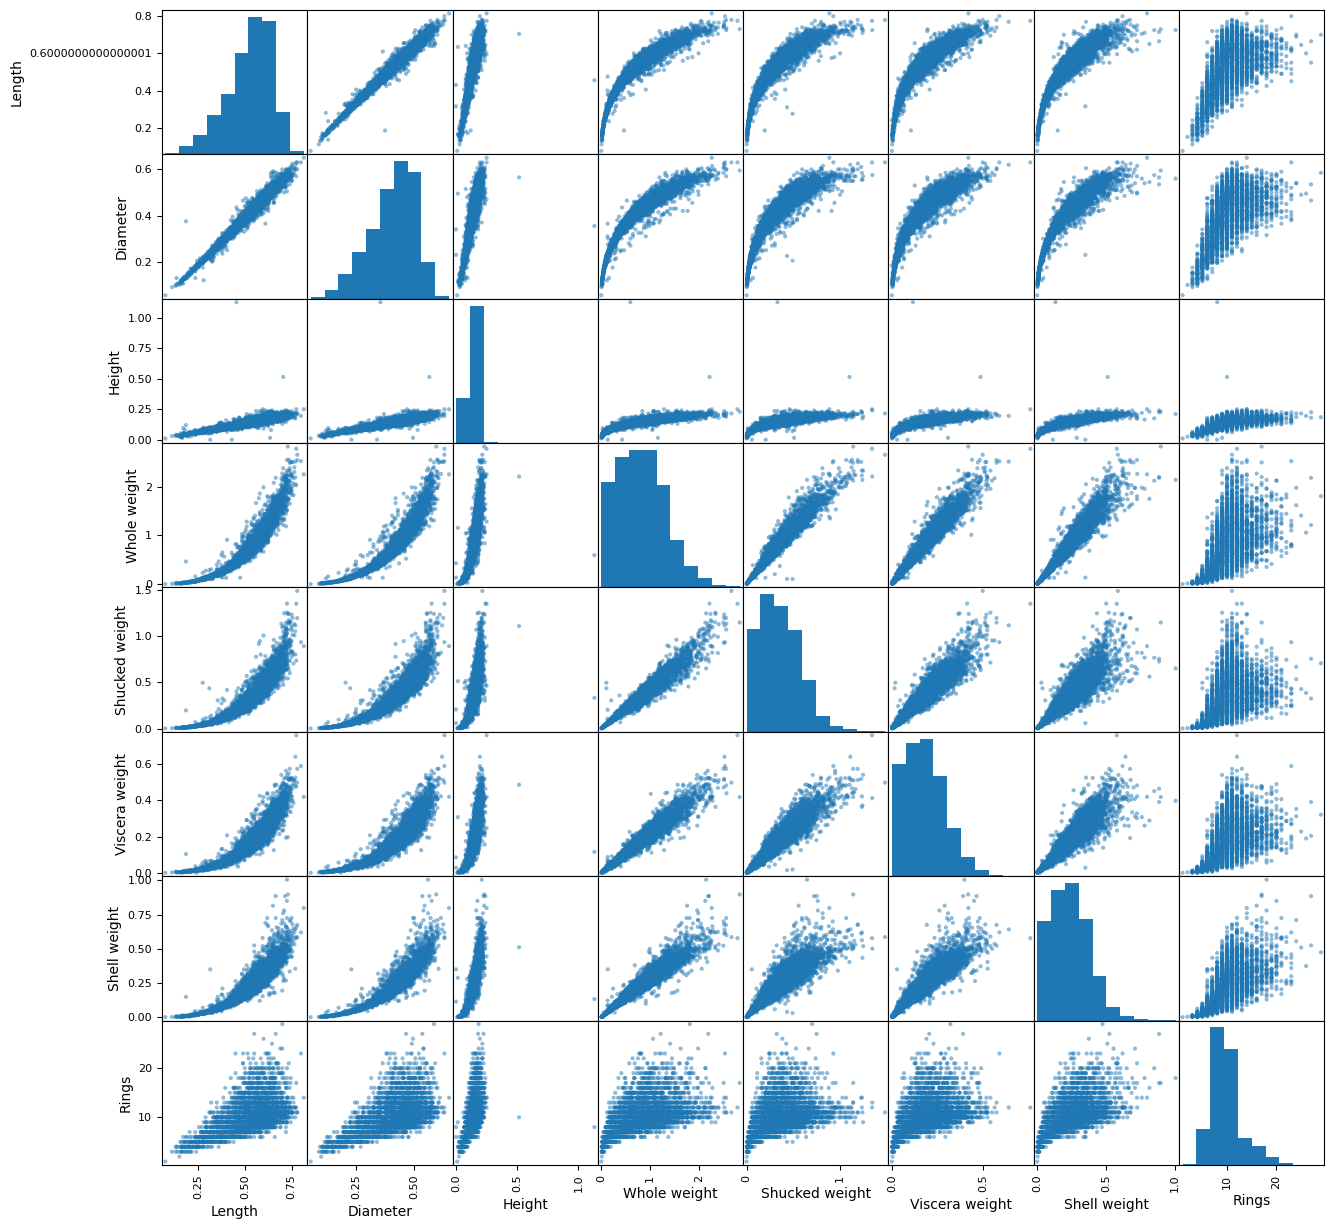

In [268]:
splot = pd.plotting.scatter_matrix(ab, alpha=0.5, figsize=(15,15))

Using the scatter plot, we can not determine any hidden holes so we can conclude that there is no missing data.

# Question 1.2 Compute the moments and summarization statistics on the data features

In [269]:
#Inorder to find mean and standard deviation of individual features - describe() 
ab.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [270]:
#variance of features
variance=ab.var()
print(variance)

Length             0.014425
Diameter           0.009850
Height             0.001749
Whole weight       0.240515
Shucked weight     0.049275
Viscera weight     0.012017
Shell weight       0.019380
Rings             10.391606
dtype: float64


In [271]:
#Median of features
median = ab.median()
print(median)

Length            0.54500
Diameter          0.42500
Height            0.14000
Whole weight      0.79975
Shucked weight    0.33600
Viscera weight    0.17100
Shell weight      0.23400
Rings             9.00000
dtype: float64


Using describe(), var(), median() method we got the mean, median and variance for particular features

In [272]:
#Skewness of data features
sknss = ab.skew()
print(sknss)

Length           -0.640240
Diameter         -0.609457
Height            3.129241
Whole weight      0.530576
Shucked weight    0.718724
Viscera weight    0.591463
Shell weight      0.620547
Rings             1.115157
dtype: float64


For a distribution, if the value of skewness is < -1 or > 1 than the distribution is highly skewed.
If it is -1 < skewness < -0.5 or  0.5 < skewness < 1, the distribution is moderately skewed 
Else -0.5 < skewness < 0.5 then the distribution is approximately symmetric.

In this dataset;  'Rings' and 'Height' are highly skewed, rest all are moderately skewed.

In [273]:
#Kurtosis for the data features
kurts = ab.kurtosis()
print(kurts)

Length             0.064698
Diameter          -0.045675
Height            76.046000
Whole weight      -0.024136
Shucked weight     0.594448
Viscera weight     0.083574
Shell weight       0.531350
Rings              2.335940
dtype: float64


For a distribution having kurtosis 3, then it is known as the mesokurtic, kurtosis > 3 it is known as leptokurtic and kurtosis < 3 platykurtic.

From above, we could clearly see that only 'Height' is Leptokurtic, rest all are Platykurtic.

In [274]:
#unique value for each feature
ab.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [275]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<AxesSubplot: >

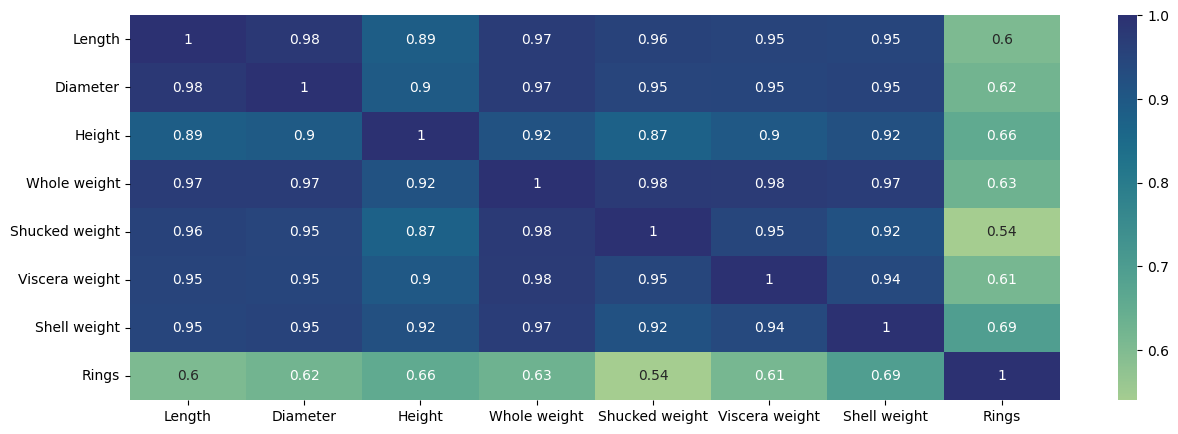

In [276]:
#Correlation between two features : 
plt.figure(figsize=(15,5))
sns.heatmap(ab.corr(method="spearman"), annot=True, cmap="crest")

#Highlighting different features

We can observe that Rings are highly correlated with Shell weight with correlation coefficient 0.63. Moreover, diameter and length are almost linearly correlated.

# Question 1.3 Use a pairsplot to look at the whole Dataset. Choose a subset, just some features and show it in report to highlight some features that seems important.

Text(0.5, 1.0, 'Percentage distribution of Sex')

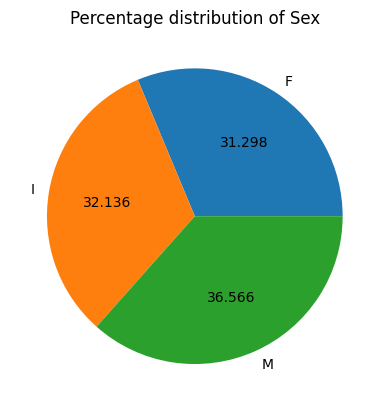

In [277]:
#Categorical analysis
ab.groupby('Sex').size().plot(kind='pie', autopct='%.3f')
plt.ylabel("")
plt.title("Percentage distribution of Sex")


We find that all three categories - M,F,I are almost equally distributed among the dataset with a little extra records for the M category.

Inorder to compare any two features together and see their relations with each other, we got percentage distribution of sex for the dataset. Following this, we would take pair plots on the basis of the 'Sex' category column for all other features

In [278]:
# Plotting the Pair-plots for all numerical columns w.r.t. each other categorised by the sex column
sns.pairplot(ab, hue="Sex", vars=('Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'))

By looking at the pairplots, we can see that some fields like whole weight, shucked weight, viscera weight and shell weight are correlated because they are creating an almost linear graph when they are plotted together on a graph. The fields Length and Diameter are also closely correlated because they have a perfect linear graph when plotted together.

The pair plots showed the correlation quite strongly but to emphasize it more prominently we shall make a heatmap to find very clearly what fields are correlated.

In [ ]:
#Creating a function to plot similar Histogram for showing distribution according to category for different features
def plot_histogram_against_sex(field, b): 
    plt.figure(figsize=(10,3))
    sns.distplot(ab.loc[ab['Sex']=='M'][field],bins=b,kde=True,label="M")
    sns.distplot(ab.loc[ab['Sex']=='F'][field],bins=b,kde=True,label="F")
    sns.distplot(ab.loc[ab['Sex']=='I'][field],bins=b,kde=True,label="I")
    plt.legend()
    plt.title("Histogram distribution for {} according to Sex".format(field))
    plt.xlabel(field)
    plt.ylabel("Frequency Distribution")
    plt.show()

Then, we move on to exploring range and distribution frequency of various features on the basis of sex. We are doing that by plotting histograms for the features. We are plotting histograms because this is singular feature analysis.

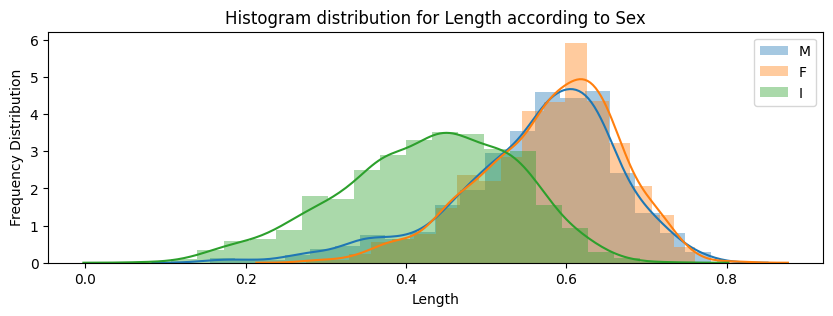

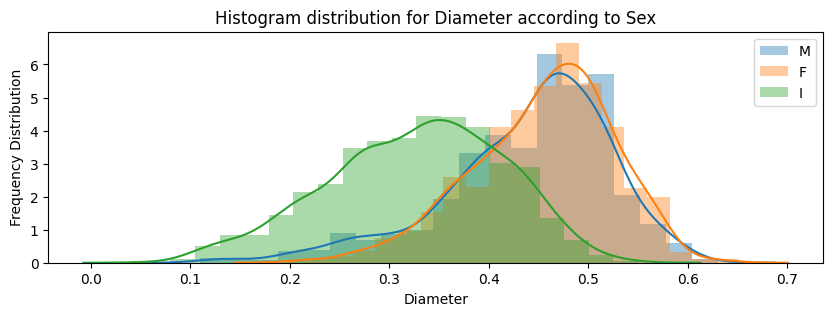

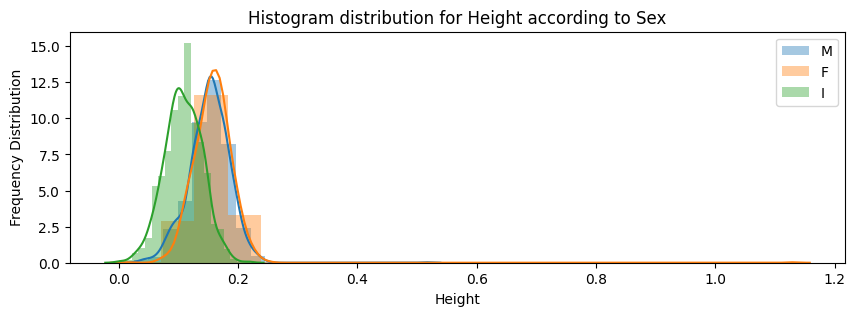

In [ ]:
plot_histogram_against_sex("Length",20) # Histogram of length on basis of sex
plot_histogram_against_sex("Diameter",20) # Histogram of diameter on basis of sex
plot_histogram_against_sex("Height",20) # Histogram of height on basis of sex

 #Weight measurements analysis

Now, we explore the weight categories similarly using the histogram plot.

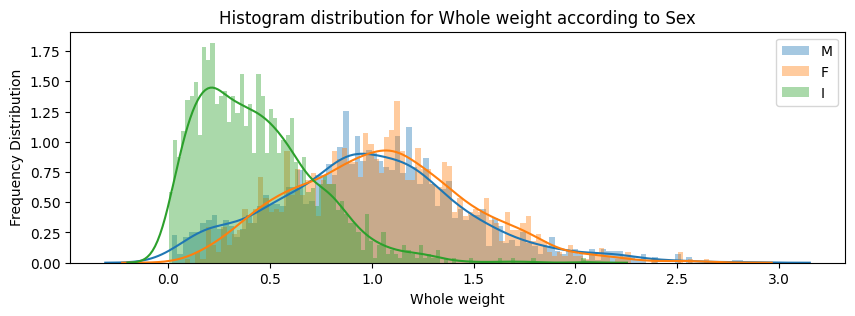

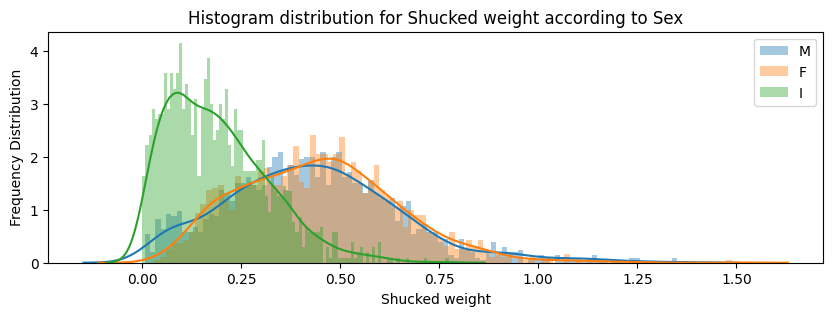

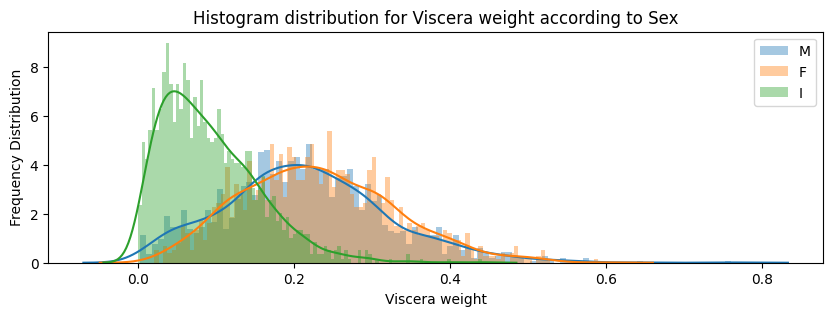

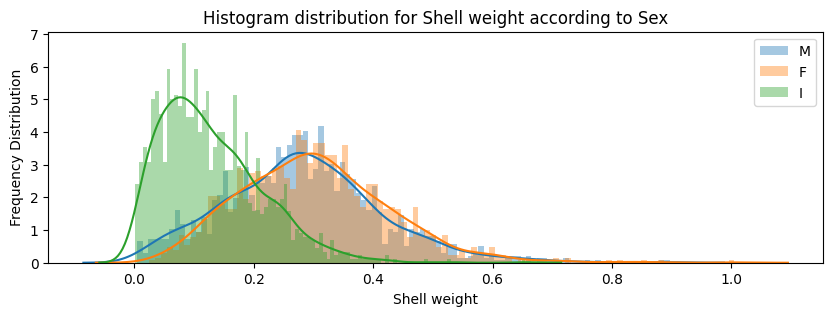

In [ ]:
plot_histogram_against_sex("Whole weight",100) # Histogram of Whole weight on basis of sex
plot_histogram_against_sex("Shucked weight",100) # Histogram of Shucked weight on basis of sex
plot_histogram_against_sex("Viscera weight",100) # Histogram of Viscera weight on basis of sex
plot_histogram_against_sex("Shell weight",100) # Histogram of Shell weight on basis of sex

Rings frequency distribution is explored separately because this is our target value in the dataset.

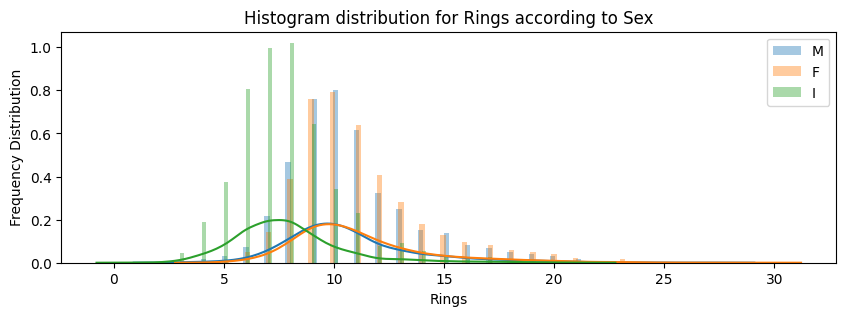

In [ ]:
# Histogram of Rings on basis of sex
plot_histogram_against_sex("Rings",100) 

In [ ]:
#Plotting histograms for looking at the data distribution separately at once
# ab.hist(figsize=(20, 20), bins=40, xlabelsize=10, ylabelsize=10, color = "yellow")

In [ ]:
# Plotting the Pair-plots for all numerical columns with respect to each other categorised by the sex column
# sns.pairplot(ab, hue="Sex", vars=('Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'))

In [ ]:
# choose a subset

# Question 1.4 Is this a balanced data?

To check for the balance in the dataset, we will plot a count plot to see the distribution. If it is a proper bell curve, then it is a balanced set, otherwise it is not.

In [ ]:
#Check of Balance Dataset
ab.Sex.unique()
ab['Sex'] = ab['Sex'].replace(['M'],'0')
ab['Sex'] = ab['Sex'].replace(['F'],'1')
ab['Sex'] = ab['Sex'].replace(['I'],'2')

<AxesSubplot: xlabel='Rings', ylabel='count'>

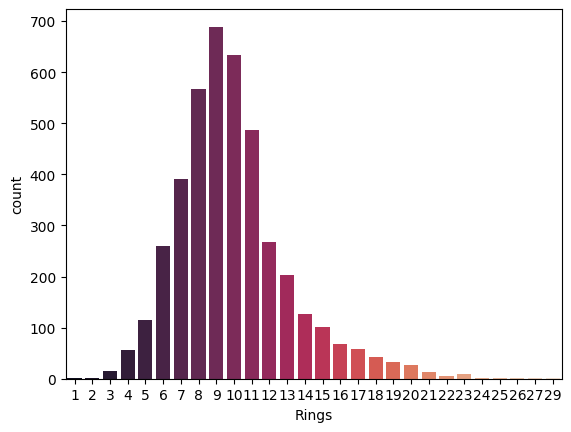

In [ ]:
sns.countplot(x=ab['Rings'],data=ab,palette='rocket')

From the plot we can clearly see that it is not make a proper bell curve due to skewness but it is a negligible so we can still use it as a balanced dataset

<AxesSubplot: xlabel='Diameter', ylabel='count'>

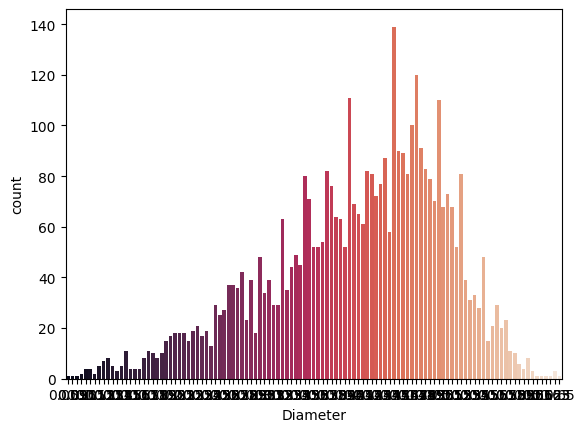

In [ ]:
sns.countplot(x=ab['Diameter'],data=ab,palette='rocket')

For a diameter feature we can clearly see that it is not a proper bellcurve  so this is unbalanced data and to correct this basically sampling techniques are used to improve performance 

# Question 1.5 Normalize the data using z-score normalization as a preprocessing step

# Before Normalization

First we have plot histogram plot for shape and range for different features individually

array([[<AxesSubplot: title={'center': 'Length'}>,
        <AxesSubplot: title={'center': 'Diameter'}>,
        <AxesSubplot: title={'center': 'Height'}>],
       [<AxesSubplot: title={'center': 'Whole weight'}>,
        <AxesSubplot: title={'center': 'Shucked weight'}>,
        <AxesSubplot: title={'center': 'Viscera weight'}>],
       [<AxesSubplot: title={'center': 'Shell weight'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

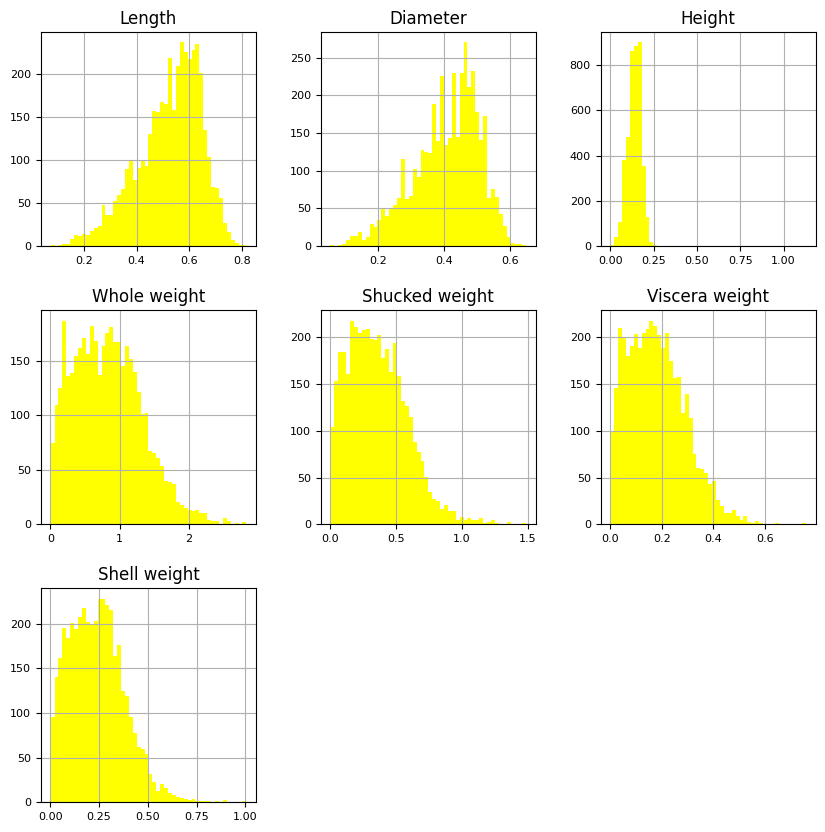

In [ ]:
abalone_for_normalization = ab.drop(columns=['Rings','Sex'])
abalone_for_normalization.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8, color="yellow")

# After Z-score Normalization

Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1.

We use the following formula to perform a z-score normalization on every value in a dataset:

New value = (x – μ) / σ

where:

x: Original value
μ: Mean of data
σ: Standard deviation of data

array([[<AxesSubplot: title={'center': 'Length'}>,
        <AxesSubplot: title={'center': 'Diameter'}>,
        <AxesSubplot: title={'center': 'Height'}>],
       [<AxesSubplot: title={'center': 'Whole weight'}>,
        <AxesSubplot: title={'center': 'Shucked weight'}>,
        <AxesSubplot: title={'center': 'Viscera weight'}>],
       [<AxesSubplot: title={'center': 'Shell weight'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

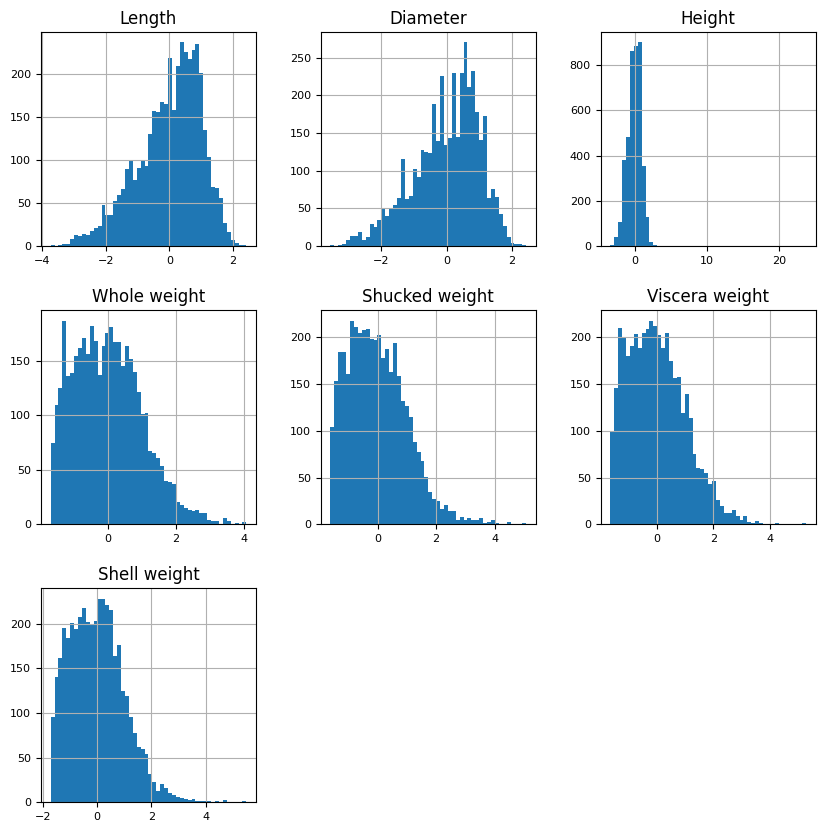

In [ ]:
# With Z-score Normalization
abalone_zscore = abalone_for_normalization.apply(stats.zscore)
abalone_zscore.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

The histogram of each columns with and without normalization the shape of graph remains almost same but the value around the centered datapoints are slightly changed

In [ ]:
# Plot one feature value, sorted from low to high, against two others
x=['Diameter']; y=['Whole weight','Shell weight']

In [ ]:
abalone_zscore['Rings'] = ab['Rings']
abalone_zscore['Sex'] = ab['Sex']
abalone_zscore.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,-1.449007,-1.439892,-1.184252,-1.230344,-1.170967,-1.205327,-1.213054,7,0
1,0.049892,0.122015,-0.108247,-0.309601,-0.463610,-0.356844,-0.207277,9,1
2,-0.699558,-0.432210,-0.347360,-0.637928,-0.648334,-0.607739,-0.602404,10,0
3,-1.615552,-1.540661,-1.423364,-1.272150,-1.216022,-1.287438,-1.320816,7,2
4,-0.824466,-1.087204,-1.064696,-0.973393,-0.983991,-0.940746,-0.853848,8,2


In [ ]:
abalone_temp = abalone_zscore[x+y]
abalone_temp.sort_values(by=x, inplace=True)
display(abalone_temp.describe())

,Diameter,Whole weight,Shell weight
count,4.176000e+03,4176.000000,4176.000000
mean,2.177909e-16,0.000000,0.000000
std,1.000120e+00,1.000120,1.000120
min,-3.556025e+00,-1.686127,-1.705166
25%,-5.833625e-01,-0.789856,-0.782007
50%,1.723991e-01,-0.059277,-0.034858
75%,7.266242e-01,0.661614,0.647633
max,2.439684e+00,4.071831,5.504099


<Figure size 640x480 with 0 Axes>

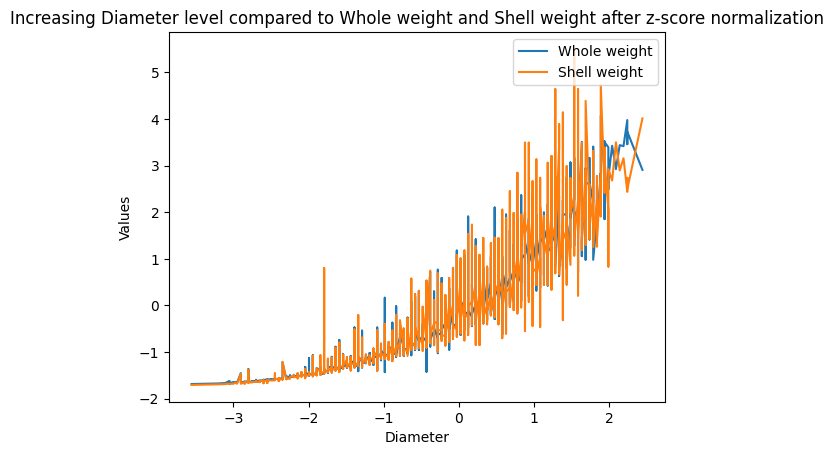

In [ ]:
plt.figure()
abalone_temp.sort_values(by=x, inplace=True)
abalone_temp.plot(x=x[0], y=y)
plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {} after z-score normalization'.format(x[0],y[0],y[1]))
plt.xlabel('Diameter')
plt.ylabel('Values')
plt.legend(loc='upper right')

# Question 2

# Question 2.4 First Divide the data into training and testing tests into in the ratio of 80% and 20%.

In [ ]:
x=abalone_zscore[['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
y=abalone_zscore['Rings']
print(ab[:10])

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   1   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   0   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   2   0.330     0.255   0.080        0.2050          0.0895          0.0395   
4   2   0.425     0.300   0.095        0.3515          0.1410          0.0775   
5   1   0.530     0.415   0.150        0.7775          0.2370          0.1415   
6   1   0.545     0.425   0.125        0.7680          0.2940          0.1495   
7   0   0.475     0.370   0.125        0.5095          0.2165          0.1125   
8   1   0.550     0.440   0.150        0.8945          0.3145          0.1510   
9   1   0.525     0.380   0.140        0.6065          0.1940          0.1475   

   Shell weight  Rings  
0         0.070      7  
1         0.210      9  
2         0.155     10  
3       

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20 , random_state=27)

# Question 2.1 and 2.2

Start by training the model with the classifier's default parameters using the training set and test the model with the test set.

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
y_pred=knn.predict(test_x)
y_pred
c_m = confusion_matrix(test_y,y_pred)
c_m
print('percentage Accuracy using default KNN is : ',100*accuracy_score(test_y,y_pred))

percentage Accuracy using default KNN is :  22.727272727272727


# Question 2.3 To find the best value for k, need to compute accuracy for a range of values of k so you can "tune" the classifier.

In [ ]:
k_value = np.empty(550)
test_accuracy = np.empty(550)
for k in range(1,550):
    knn= KNeighborsClassifier(n_neighbors=k)         
    knn.fit(train_x,train_y)
    y_pred = knn.predict(train_x)
    test_accuracy[k] = knn.score(test_x, test_y)
    k_value[k] = k

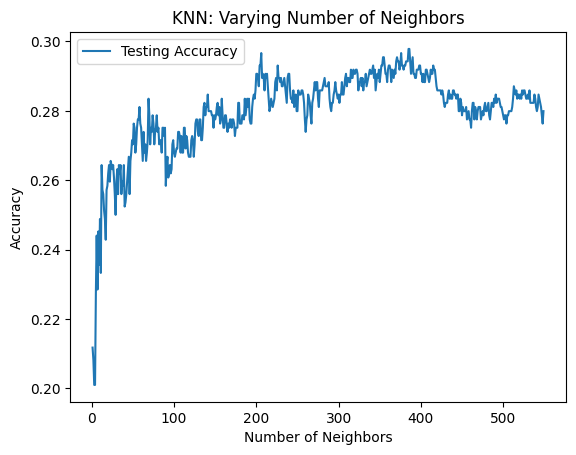

In [ ]:
plt.title('KNN: Varying Number of Neighbors')
plt.plot(k_value[1:],test_accuracy[1:], label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
max_index= np.where(test_accuracy == max(test_accuracy))
print("Max accuracy:",max(test_accuracy),"K value:",k_value[max_index[0]][0])

Max accuracy: 0.29784688995215314 K value: 385.0


# Question 2.8
As KNeighborsClassifier() functions give liberty to change weight type as well as which algorithm to use for finding distance (i.e euclidean,manhattan). Using different value of p(default,1,2) and weight=distance because it will have greater influence on near neighbours. Note: Default and p=2 will give same curve as default value is 2.

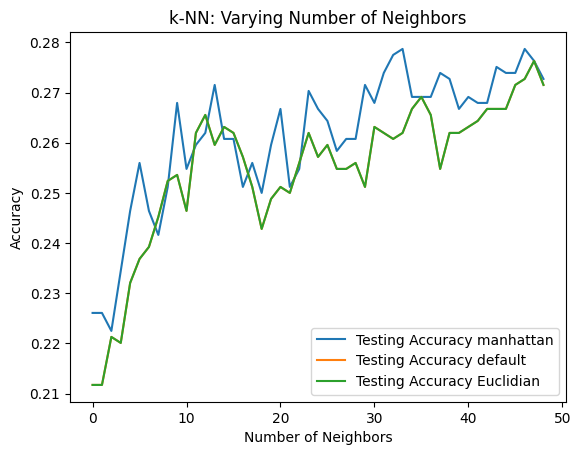

Max accuracy for p=0 : 27.631578947368425 % K value: 47
Max accuracy for p=1 : 27.870813397129186 % K value: 33
Max accuracy for p=2: 27.631578947368425 % K value: 47


In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 50)
train_accuracy_m = np.empty(len(neighbors))
test_accuracy_m = np.empty(len(neighbors))
train_accuracy_e = np.empty(len(neighbors))
test_accuracy_e = np.empty(len(neighbors))
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_m = KNeighborsClassifier(n_neighbors=k,p=1,weights='distance') # Manhattan distance
    knn_e = KNeighborsClassifier(n_neighbors=k,p=2,weights='distance') # Euclidian distance
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    # Fit the classifier to the training data
    knn_m.fit(train_x, train_y)
    knn_e.fit(train_x, train_y)
    knn.fit(train_x, train_y)
    #Compute accuracy on the training set
    train_accuracy_m[i] = knn_m.score(train_x, train_y)
    train_accuracy_e[i] = knn_e.score(train_x, train_y)
    train_accuracy[i] = knn.score(train_x, train_y)

    #Compute accuracy on the testing set
    test_accuracy_m[i] = knn_m.score(test_x, test_y)
    test_accuracy_e[i] = knn_e.score(test_x, test_y)
    test_accuracy[i] = knn.score(test_x, test_y)
    neighbors[i]=i

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_m, label = 'Testing Accuracy manhattan')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy default')
plt.plot(neighbors, test_accuracy_e, label = 'Testing Accuracy Euclidian')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## printing max accuracy for each param
print("Max accuracy for p=0 :",max(test_accuracy[1:])*100,"% K value:",neighbors[np.where(test_accuracy == max(test_accuracy[1:]))][0])
print("Max accuracy for p=1 :",max(test_accuracy_m[1:])*100,"% K value:",neighbors[np.where(test_accuracy_m == max(test_accuracy_m[1:]))][0])
print("Max accuracy for p=2:",max(test_accuracy_e[1:])*100,"% K value:",neighbors[np.where(test_accuracy_e == max(test_accuracy_e[1:]))][0])


Getting only 2 charts as default and euclidian are the same thing.

# Question 2.5 - Fold Cross Validation

In [ ]:
# clf = svm.SVC(kernel = 'linear', C=1).fit(x_train, y_train)
# clf.score(x_test,y_test)

# clf=svm.SVC(kernel='linea')
# scores = cross_val_score


In [ ]:
try:
    scores = []
    best_svr = SVR(kernel='rbf')
    cv = KFold(n_splits=5, shuffle=False)
    for train_index, test_index in cv.split(x):
        print("Train Index: ", train_index, "\n")
        print("Test Index: ", test_index)

        train_x, test_x, train_y, test_y = x[train_index], x[test_index], y[train_index], y[test_index]
        best_svr.fit(train_x, train_y)
        scores.append(best_svr.score(test_x, test_y))
except KeyError:
    pass

Train Index:  [ 836  837  838 ... 4173 4174 4175] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

In [ ]:
best_svr.fit(train_x, train_y)
scores.append(best_svr.score(test_x, test_y))

In [ ]:
print(np.mean(scores))

0.5577556026963394


In [ ]:
model = svm.SVC()
accuracy = cross_val_score(model, x, y, scoring='accuracy', cv = 5)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.22368421 0.29700599 0.25149701 0.2742515  0.28742515]
Accuracy of Model with Cross Validation is: 26.67727702489757


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
x.shape

(4176, 8)

In [ ]:
y.shape

(100,)

In [ ]:
k_scores=[]

for i in range(1,150):
    knn= KNeighborsClassifier(n_neighbors=i)
    accuracy = cross_val_score(knn, train_x, train_y, scoring='accuracy', cv = 5)
    k_scores.append(accuracy.mean())

k_scores

[0.20449101796407185,
 0.2119760479041916,
 0.2032934131736527,
 0.20778443113772455,
 0.22035928143712574,
 0.21556886227544908,
 0.2176646706586826,
 0.22664670658682637,
 0.23263473053892217,
 0.2251497005988024,
 0.23353293413173654,
 0.23682634730538923,
 0.237125748502994,
 0.24041916167664673,
 0.238622754491018,
 0.244311377245509,
 0.24850299401197606,
 0.2440119760479042,
 0.2502994011976048,
 0.24640718562874256,
 0.2550898203592814,
 0.25359281437125747,
 0.2568862275449102,
 0.25359281437125747,
 0.24700598802395207,
 0.25089820359281434,
 0.24910179640718563,
 0.24131736526946107,
 0.2440119760479042,
 0.25089820359281434,
 0.2479041916167665,
 0.25209580838323353,
 0.25389221556886227,
 0.2529940119760479,
 0.25089820359281434,
 0.25209580838323353,
 0.25479041916167666,
 0.2565868263473054,
 0.2526946107784431,
 0.2502994011976048,
 0.25209580838323353,
 0.25179640718562873,
 0.2532934131736527,
 0.2479041916167665,
 0.25299401197604793,
 0.25508982035928146,
 0.2520958

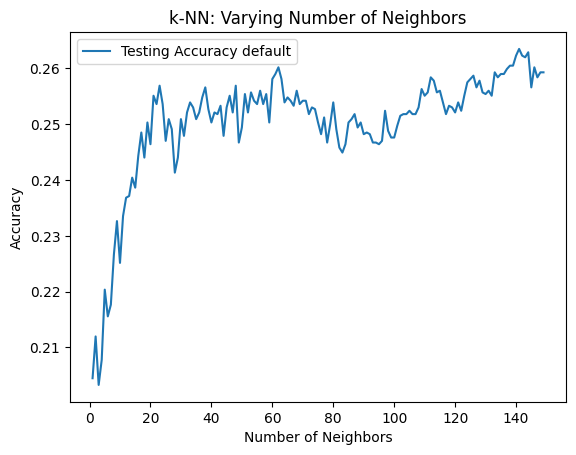

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
# plt.plot(neighbors, test_accuracy_m, label = 'Testing Accuracy manhattan')
plt.plot(range(1,150), k_scores, label = 'Testing Accuracy default')
# plt.plot(neighbors, test_accuracy_e, label = 'Testing Accuracy Euclidian')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
np.argmax(k_scores)

KeyboardInterrupt: 

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 22}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.25479729536143025

In [ ]:
from matplotlib.patches import Patch

rng = np.random.RandomState(27)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 5

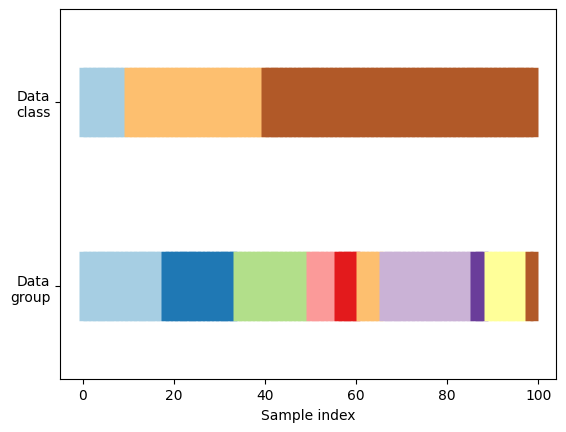

In [ ]:
n_points = 100
X = rng.randn(100, 10)

percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Generate uneven groups
group_prior = rng.dirichlet([2] * 10)
groups = np.repeat(np.arange(10), rng.multinomial(100, group_prior))


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )


visualize_groups(y, groups, "no groups")


In [ ]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

<AxesSubplot: title={'center': 'KFold'}, xlabel='Sample index', ylabel='CV iteration'>

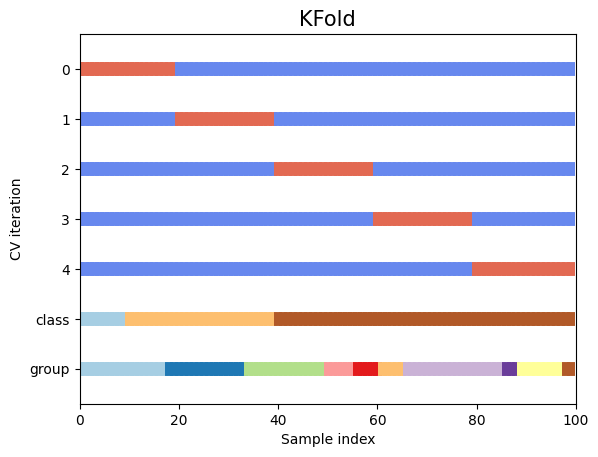

In [ ]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

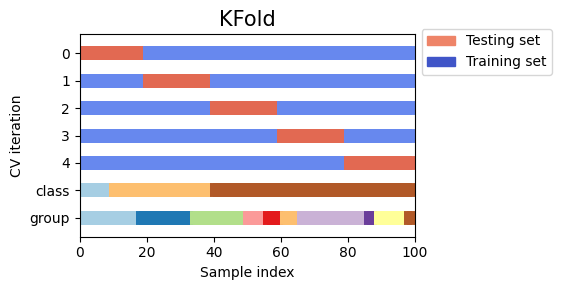

In [ ]:
cv =KFold
this_cv = cv(n_splits=n_splits)
fig, ax = plt.subplots(figsize=(6, 3))
plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

ax.legend(
    [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
    ["Testing set", "Training set"],
    loc=(1.02, 0.8),
    )
    # Make the legend fit
plt.tight_layout()
fig.subplots_adjust(right=0.7)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

model = linear_model.LinearRegression()
